# Time Series Anomaly Detection



Feng Li

School of Statistics and Mathematics

Central University of Finance and Economics

[feng.li@cufe.edu.cn](mailto:feng.li@cufe.edu.cn)

[https://feng.li/python](https://feng.li/python)

## What do outliers mean?

![Two types of outliers](figures/tsoutliers.webp)

## Are time series outliers all harmful?

- **Baseline**: Whether outliers are noise or useful signal, it purely depends upon **business objective**. 


- **Business objective - How to retain Premium customers?**

    Here premium customers can be defined on the basis on their usage (let's consider monthly usage is more then Rs. 5000). Percentage of such customers over total customer base will be very less (let say 3%). So such customer will become outliers as their usages are very much different from the usages (let say Rs. 750) of most of the customers (here 97%). However those outliers are our main data of analysis. So these outliers are good & can't be excluded.
    
- **Business objective - To analyse the usage pattern of customers.**

    If we will include above mentioned premium customers (or a customer whose average monthly usage is Rs. 1000 but one month, it has been Rs. 4000 due to some reason) in analyzing usage pattern of all customers then their effect will be bad on model's outcome. Hence these customer's usages are bad outliers & needs to removed these records.


- **Business objective - To analyse the fraud in shopping using credit cards.**

    If a customer never do any purchases in the night however their is an transaction at 2:00 AM. This transaction is a candidate of good outlier as it may be used to detect fraud.

- **Business objective - To analyse the transaction of sale for the last 1 year for a product (e.g. Bread)**

    Normally the average units of bread bought in any transaction are 1-8 units. But one week suddenly it has been 10-20 units of bread transaction. On the further investigation it was found that, the people were stocking the bread because they were expecting the storm to hit at that location in that week. If you are interested in looking at sale of bread on regular basis, you may not want to involve a situation which include a storm in your model because it is not a normal behavior. So that weeks' transactions are bad outliers & needs to be removed.

## Two types of time series outliers

###  Point outlier

A point outlier is a datum that behaves unusually in a specific time instance when compared either to the other values in the time series (global outlier), or to its neighboring points (local outlier). 

- Example: are you aware of the Gamestop frenzy? A slew of young retail investors bought GME stock to get back at big hedge funds, driving the stock price way up. That sudden, short-lived spike that occurred due to an unlikely event is an additive (point) outlier. The unexpected growth of a time-based value in a short period (looks like a sudden spike) comes under additive outliers.
![Game Stop](figures/gamestop.webp)

### Subsequence outlier

- Consecutive points in time whose joint behavior is unusual, although each observation individually is not necessarily a point outlier. 

- Subsequence outliers can also be global or local, and can affect one (univariate subsequence outlier) or more (multivariate subsequence outlier) time-dependent variables. 

![Subsequence](figures/outliersubsequence.png)

## Anomaly detection techniques


- STL decomposition

- Classification and Regression Trees (CART)

- Clustering-based anomaly detection

- Detection using Forecasting

## STL decomposition

- STL stands for seasonal-trend decomposition procedure based on LOESS. This technique gives you the ability to split your time series signal into three parts: seasonal, trend, and residue.

- It works for seasonal time-series, which is also the most popular type of time series data. To generate an STL decomposition plot, we just use the ever-amazing `statsmodels` to do the heavy lifting for us.


- Anomaly detection using STL decomposition is simple and robust. It can handle a lot of different situations, and all anomalies can still be intuitively interpreted.


- The biggest downside of this technique is rigid tweaking options. Apart from the threshold and maybe the confidence interval, there is not much you can do about it. 

- For example, When you are tracking users on your website that was closed to the public and then was suddenly opened (due to COVID 19). In this case, you should track anomalies that occur before and after launch periods separately.



##  Anomaly detection with Sales Data

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d') 
catfish_sales = pd.read_csv('data/catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)
#infer the frequency of the data
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))
catfish_sales

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239
...,...
2012-08-01,14442
2012-09-01,13422
2012-10-01,13795


### Introducing an anomaly

In [3]:
start_date = datetime(1996,1,1)
end_date = datetime(2000,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]
lim_catfish_sales.loc["1998-12-1"]['Total'] = 10000 # Introduce an anomaly
lim_catfish_sales

,Total
Date,
1996-01-01,20322
1996-02-01,20613
1996-03-01,22704
1996-04-01,20276
1996-05-01,20669
1996-06-01,18074
1996-07-01,18719
1996-08-01,20217
1996-09-01,19642


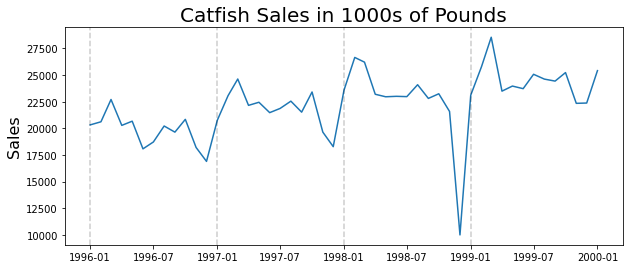

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

### Anomaly detection using STL Decompose

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

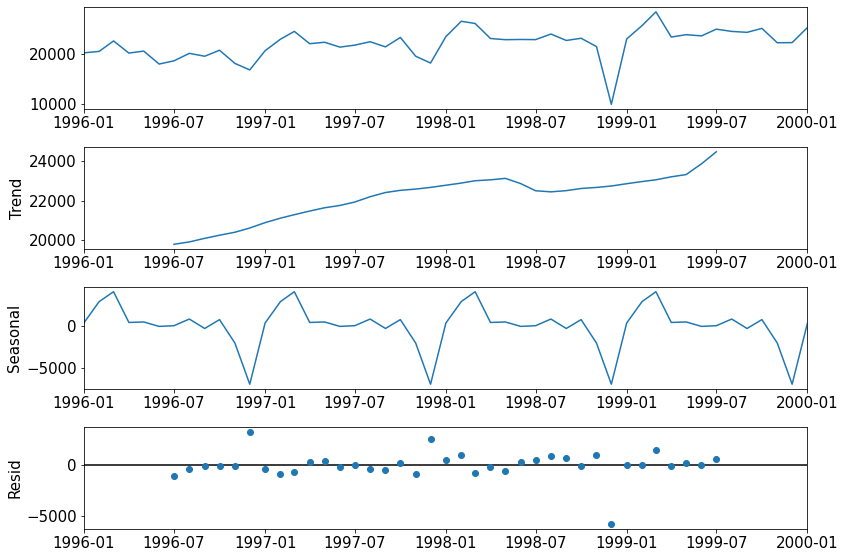

In [6]:
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=15)
result = seasonal_decompose(lim_catfish_sales,model='additive')
fig = result.plot()

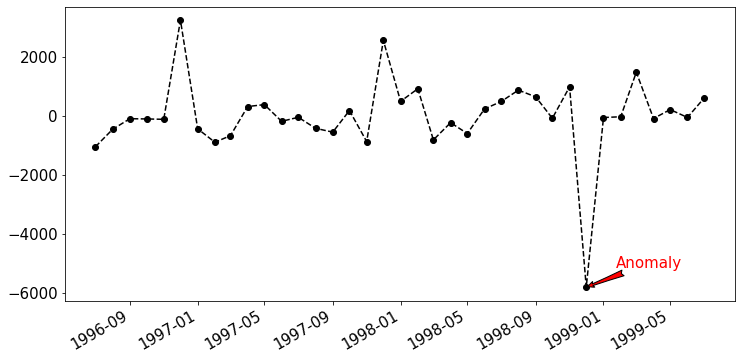

In [7]:
plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)

fig, ax = plt.subplots()
x = result.resid.index
y = result.resid.values
ax.plot_date(x, y, color='black',linestyle='--')

ax.annotate('Anomaly', (mdates.date2num(x[35]), y[35]), xytext=(30, 20), 
           textcoords='offset points', color='red',arrowprops=dict(facecolor='red',arrowstyle='fancy'))

fig.autofmt_xdate()
plt.show()

### CART based anomaly detection using isolation forest


- The main idea is to explicitly identify anomalies instead of profiling normal data points. 

- In other words, Isolation Forest detects anomalies purely based on the fact that **anomalies are data points that are few and different**. The anomalies isolation is implemented without employing any distance or density measure.

- Isolation Forest is one popular CART method, like any tree ensemble method, is based on decision trees.

- When applying an Isolation Forest model, we set `contamination = outliers_fraction`, that is telling the model what proportion of outliers are present in the data. This is a trial/error metric.

- The algorithm fits, predicts (data), and performs outlier detection on data, and returns 1 for normal, -1 for the anomaly.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [9]:
catfish_sales.loc["1998-12-1"]['Total'] = 10000 # Introduce an anomaly
catfish_sales.loc["1993-3-1"]['Total'] = 30000
catfish_sales.loc["2003-3-1"]['Total'] = 35000

<AxesSubplot:xlabel='Date'>

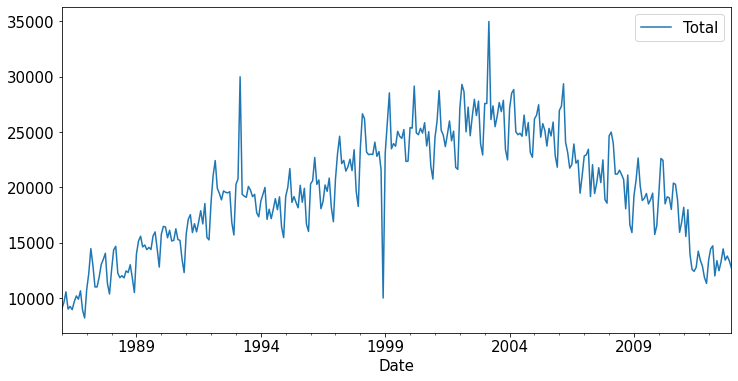

In [10]:
plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)
catfish_sales.plot()

In [11]:
scaler = StandardScaler()
np_scaled = scaler.fit_transform(catfish_sales.values.reshape(-1, 1))
data = pd.DataFrame(np_scaled)

In [12]:
# train isolation forest
outliers_fraction = float(0.01)
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data) 

IsolationForest(contamination=0.01)

In [13]:
catfish_sales['anomaly'] = model.predict(data)
catfish_sales

,Total,anomaly
Date,,
1986-01-01,9034,1
1986-02-01,9596,1
1986-03-01,10558,1
1986-04-01,9002,1
1986-05-01,9239,1
...,...,...
2012-08-01,14442,1
2012-09-01,13422,1
2012-10-01,13795,1


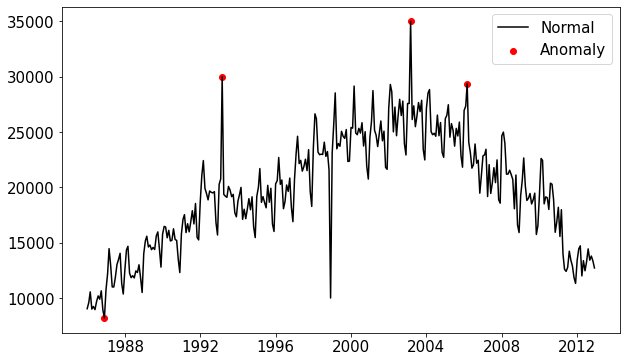

In [14]:
# visualization
fig, ax = plt.subplots(figsize=(10,6))
a = catfish_sales.loc[catfish_sales['anomaly'] == -1, ['Total']] #anomaly

ax.plot(catfish_sales.index, catfish_sales['Total'], color='black', label = 'Normal')
ax.scatter(a.index,a['Total'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

### Exercise 

- Re do the above steps and change `outliers_fraction=float(0.01)` from `0.01` to `0.05`. What could you see?

- When `outliers_fraction=float(0.05)`, why there are many outliers detected at the bottom left?

### Anomaly detection using clustering method


- The approach is pretty straightforward. Data instances that fall outside of defined clusters could potentially be marked as anomalies. 

- Dataset Description: Data contains information on shopping and purchase as well as information on price competitiveness.


In [15]:
df = pd.read_csv('data/TimeSeriesExpedia.csv')
df

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,63,2013-05-23 11:56:25,14,100,NaN,NaN,219,104517,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,90,2013-04-23 11:12:24,14,100,NaN,NaN,219,104517,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,133,2013-03-14 11:27:28,5,219,NaN,NaN,219,104517,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,148,2013-03-21 02:24:03,10,4,NaN,NaN,219,104517,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,203,2013-01-03 20:48:24,5,219,NaN,NaN,219,104517,4,4.0,...,NaN,NaN,NaN,NaN,1.0,0.0,14.0,0,NaN,0
5,375,2013-01-19 16:51:27,5,219,NaN,NaN,219,104517,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
6,712,2013-01-26 11:34:23,5,219,NaN,NaN,219,104517,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
7,751,2013-04-29 09:39:50,5,219,NaN,NaN,219,104517,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
8,803,2013-03-25 19:43:44,5,219,NaN,NaN,219,104517,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
9,932,2013-01-02 22:01:57,32,220,4.00,246.15,219,104517,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


- Detecting the number of clusters

    - First we need to know the number of clusters. 
    - The **Elbow Method** works pretty efficiently for this.
    - The Elbow method is a graph of the number of clusters vs the variance explained/objective/score


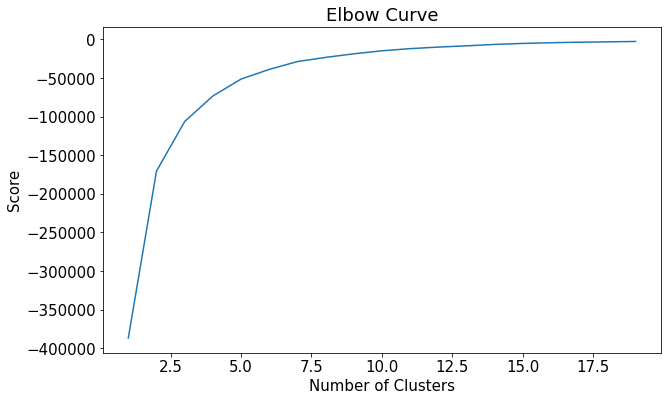

In [16]:
from sklearn.cluster import KMeans
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

- From the above elbow curve, we see that the graph levels off after 10 clusters, implying that the addition of more clusters do not explain much more of the variance in our relevant variable; in this case `price_usd`.

- We set `n_clusters=10`, and upon generating the k-means output, use the data to plot the 3D clusters.

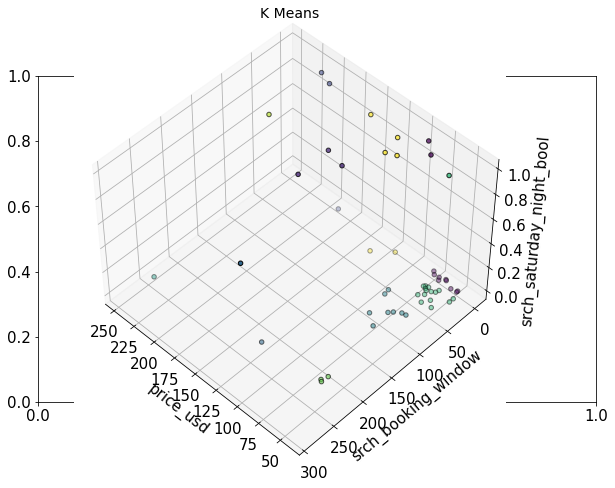

In [17]:
X = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=10)
km.fit(X)
km.predict(X)
labels = km.labels_
# #Plotting
from mpl_toolkits.mplot3d import Axes3D
fig,ax = plt.subplots(figsize=(10,6))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134, auto_add_to_figure=False)
fig.add_axes(ax) 
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("price_usd")
ax.set_ylabel("srch_booking_window")
ax.set_zlabel("srch_saturday_night_bool")
plt.title("K Means", fontsize=14);

- We see that the first component explains almost 50% of the variance. The second component explains over 30%. However, notice that almost none of the components are really negligible. The first 2 components contain over 80% of the information. So, we will set `n_components=2`.

- The underlying assumption in the clustering-based anomaly detection is that if we cluster the data, normal data will belong to clusters while anomalies will not belong to any clusters, or belong to small clusters. 

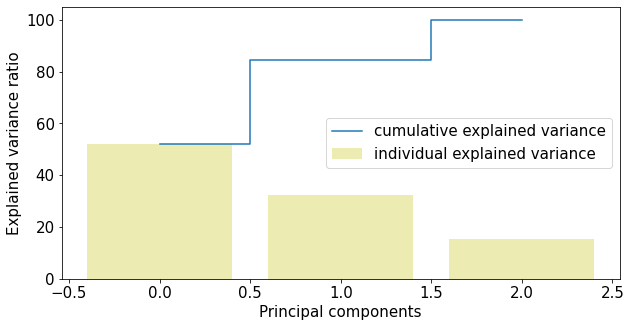

In [18]:
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X = data.values
X_std = StandardScaler().fit_transform(X)
#Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'y')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [19]:
# Take useful feature and standardize them
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X_std = StandardScaler().fit_transform(X)
data = pd.DataFrame(X_std)
# reduce to 2 important features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [20]:
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
df['cluster'] = kmeans[9].predict(data)
df.index = data.index
df['principal_feature1'] = data[0]
df['principal_feature2'] = data[1]
df['cluster'].value_counts()

3    14
8    10
0     8
7     4
1     4
2     4
6     3
5     3
4     2
9     2
Name: cluster, dtype: int64

- Calculate the distance between each point and its nearest centroid. The biggest distances are considered anomalies.

- We use `outliers_fraction` to provide information to the algorithm about the proportion of the outliers present in our data set.

- Similarly to the IsolationForest algorithm. This is largely a hyperparameter that needs hit/trial or grid-search to be set right – as a starting figure, let’s estimate, `outliers_fraction=0.1`

In [21]:
# return Series of distance between each point and its distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series(dtype='float64')
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i]=np.linalg.norm(Xa-Xb)
    return distance

outliers_fraction = 0.1
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[9])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
df['anomaly1'] = (distance >= threshold).astype(int)

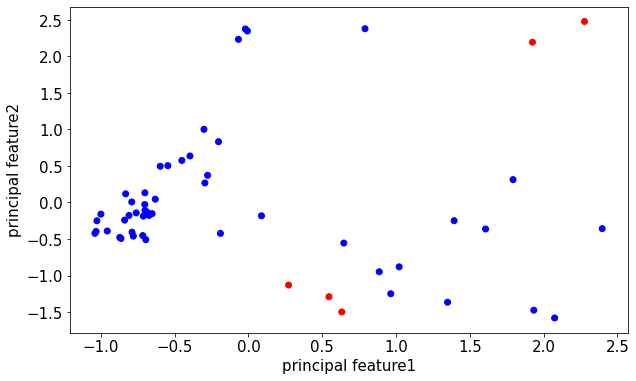

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

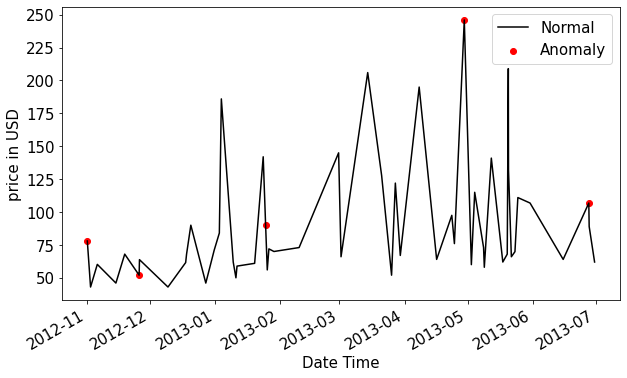

In [23]:
df = df.sort_values('date_time')
#df['date_time_int'] = df.date_time.astype(np.int64)
fig, ax = plt.subplots(figsize=(10,6))

a = df.loc[df['anomaly1'] == 1, ['date_time', 'price_usd']] #anomaly


ax.plot(pd.to_datetime(df['date_time']), df['price_usd'], color='k',label='Normal')
ax.scatter(pd.to_datetime(a['date_time']),a['price_usd'], color='red', label='Anomaly')
ax.xaxis_date()
plt.xlabel('Date Time')
plt.ylabel('price in USD')
plt.legend()
fig.autofmt_xdate()
plt.show()

### Anomaly detection using Forecasting 


- Several points from the past generate a forecast of the next point with the addition of some random variable, which is usually white noise. 

- Forecasted points in the future will generate new points and so on. Its obvious effect on the forecast horizon – the signal gets smoother.

- Each time you work with a new signal, you should build a new forecasting model.

- Your signal should be stationary after differencing. In simple words, it means your signal should not be dependent on time, which is a significant constraint.

- We can utilize different forecasting methods such as Moving Averages, Autoregressive approach, and ARIMA with its different variants. 

- The difficult part of using this method is that you should select the number of differences, number of autoregressions, and forecast error coefficients.


- The procedure for detecting anomalies with ARIMA is:

    - Predict the new point from past datums and find the difference in magnitude with those in the training data.
    - Choose a threshold and identify anomalies based on that difference threshold.

    - We use a popular module in time series called `prophet`. This module specifically caters to stationarity and seasonality, and can be tuned with some hyper-parameters.


In [24]:
t = pd.DataFrame()
t['ds'] = catfish_sales.index
t['y'] = catfish_sales['Total'].values
t

,ds,y
0,1986-01-01,9034
1,1986-02-01,9596
2,1986-03-01,10558
3,1986-04-01,9002
4,1986-05-01,9239
...,...,...
319,2012-08-01,14442
320,2012-09-01,13422
321,2012-10-01,13795
322,2012-11-01,13352


In [25]:
from prophet import Prophet
def fit_predict_model(dataframe, interval_width = 0.99, changepoint_range = 0.8):
    m = Prophet(daily_seasonality = False, yearly_seasonality = False, weekly_seasonality = False,
                seasonality_mode = 'additive', 
                interval_width = interval_width,
                changepoint_range = changepoint_range)
    m = m.fit(dataframe)
    forecast = m.predict(dataframe)
    forecast['fact'] = dataframe['y'].reset_index(drop = True)
    return forecast
    
pred = fit_predict_model(t)

Initial log joint probability = -15.2405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      90       697.457    0.00195447       191.233   1.882e-05       0.001      160  LS failed, Hessian reset 
      99       698.836     0.0012588       84.3828      0.2852      0.2852      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     195       699.445   0.000884218       84.4718   1.121e-05       0.001      359  LS failed, Hessian reset 
     199       699.485   0.000215781       52.8067           1           1      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     250       699.636   2.05622e-05       68.2599   3.669e-07       0.001      469  LS failed, Hessian reset 
     299       699.638   6.66519e-06       61.6449           1           1      537   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

In [26]:
def detect_anomalies(forecast):
    forecasted = forecast[['ds','trend', 'yhat', 'yhat_lower', 'yhat_upper', 'fact']].copy()

    forecasted['anomaly'] = 0
    forecasted.loc[forecasted['fact'] > forecasted['yhat_upper'], 'anomaly'] = 1
    forecasted.loc[forecasted['fact'] < forecasted['yhat_lower'], 'anomaly'] = -1

    #anomaly importances
    forecasted['importance'] = 0
    forecasted.loc[forecasted['anomaly'] ==1, 'importance'] = \
        (forecasted['fact'] - forecasted['yhat_upper'])/forecast['fact']
    forecasted.loc[forecasted['anomaly'] ==-1, 'importance'] = \
        (forecasted['yhat_lower'] - forecasted['fact'])/forecast['fact']
    
    return forecasted

pred = detect_anomalies(pred)

In [27]:
import altair as alt
def plot_anomalies(forecasted):
    interval = alt.Chart(forecasted).mark_area(interpolate="basis", color = '#7FC97F').encode(
    x=alt.X('ds:T',  title ='date'),
    y='yhat_upper',
    y2='yhat_lower',
    tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive().properties(
        title='Anomaly Detection'
    )

    fact = alt.Chart(forecasted[forecasted.anomaly==0]).mark_circle(size=15, opacity=0.7, color = 'Black').encode(
        x='ds:T',
        y=alt.Y('fact', title='Sales'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper']
    ).interactive()

    anomalies = alt.Chart(forecasted[forecasted.anomaly!=0]).mark_circle(size=30, color = 'Red').encode(
        x='ds:T',
        y=alt.Y('fact', title='Sales'),    
        tooltip=['ds', 'fact', 'yhat_lower', 'yhat_upper'],
        size = alt.Size( 'importance', legend=None)
    ).interactive()

    return alt.layer(interval, fact, anomalies)\
              .properties(width=870, height=450)\
              .configure_title(fontSize=20)
              
plot_anomalies(pred)

alt.LayerChart(...)

## How to deal with the anomalies?

### Understanding the business case

- Anomalies almost always provide new information and perspective to your problems. 
- Stock prices going up suddenly? There has to be a reason for this like we saw with Gamestop, a pandemic could be another. So, understanding the reasons behind the spike can help you solve the problem in an efficient manner.

- Understanding the business use case can also help you identify the problem better. For instance, you might be working on some sort of fraud detection which means your primary goal is indeed understanding the outliers in the data.

- If none of this is your concern, you can move to remove or smoothen out the outlier.


### Using statistical methods to adjust outliers

- Statistical methods let you adjust the value of your outlier to match the original distribution. 

### Removing the Outlier

- The last option if none of the above two sparks any debate in your solution is to get ride of the anomalies. 